# Text Classification

Since we are doing aspect based sentiment analysis, tagging each review with a correspoding label is essential. This helps in efficiently calculating the polarity of sentiment based on the aspect. For example, if the review is labelled as 'food, service', it is sufficient to measure the polarity for food and service aspects for that particular review.

Techniques used:
    1. Clustering with LDA
    2. Classification with Linear SVC
    3. Classification with 1d Convolutional Neural Networks

## 1. Clustering with LDA

Since this is unlabelled dataset, LDA clustering technique was used initially to find out the labels for each review. The number of topics is 4, since we have 4 aspects(ambience, food, cleanliness, service). 
1. Removed stopwords
2. Number of iterations - 20
3. Calculated perplexity for each iteration

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords

def find_topics(reviews):
    tf_vectorizer = CountVectorizer(max_df=0.1, min_df=1, stop_words='english', analyzer='word')
    tf = tf_vectorizer.fit_transform(reviews)
    tf_feature_names = tf_vectorizer.get_feature_names()
    num_topics = 4
    X_train, X_test = train_test_split(tf, test_size=0.3, random_state=0)
    lda = LatentDirichletAllocation(n_components=num_topics,
                                            max_iter=20,verbose=1,
                                    evaluate_every=1, n_jobs=1,
                                    random_state=0).fit(X_train)

    num_top_words = 30

    for topic_idx, topic in enumerate(lda.components_):
        print("Topic %d:" % (topic_idx))
        words = [(tf_feature_names[i], topic[i]) \
                 for i in topic.argsort()[::-1][0:num_top_words]]
        print(words)
        print("\n")

if __name__ == "__main__":


    input_file = '/Users/revathyramasundaram/revathy/Stevens/BIA-660-Web-mining/yelp_dataset/il_reviews.csv'
    df = pd.read_csv(input_file, engine='python', encoding='utf-8', error_bad_lines=False)
    reviews = df.text
    find_topics(reviews)


iteration: 1 of max_iter: 20, perplexity: 4146.9366
iteration: 2 of max_iter: 20, perplexity: 3979.1709
iteration: 3 of max_iter: 20, perplexity: 3884.9996
iteration: 4 of max_iter: 20, perplexity: 3809.5857
iteration: 5 of max_iter: 20, perplexity: 3748.6591
iteration: 6 of max_iter: 20, perplexity: 3700.4762
iteration: 7 of max_iter: 20, perplexity: 3662.4844
iteration: 8 of max_iter: 20, perplexity: 3631.5937
iteration: 9 of max_iter: 20, perplexity: 3605.9259
iteration: 10 of max_iter: 20, perplexity: 3584.4354
iteration: 11 of max_iter: 20, perplexity: 3566.2357
iteration: 12 of max_iter: 20, perplexity: 3550.5817
iteration: 13 of max_iter: 20, perplexity: 3537.0691
iteration: 14 of max_iter: 20, perplexity: 3524.5097
iteration: 15 of max_iter: 20, perplexity: 3513.3068
iteration: 16 of max_iter: 20, perplexity: 3503.8537
iteration: 17 of max_iter: 20, perplexity: 3495.3230
iteration: 18 of max_iter: 20, perplexity: 3487.3586
iteration: 19 of max_iter: 20, perplexity: 3480.3721
it

The clusters identified by LDA are not unique. Since the reviews are of shorter length, around 90 - 100, LDA is not the best option to study patterns in the dataset.<br> 
Generating a word cloud out of the identified feature names gives a better visualization and understanding that the clusters are not unique. 

## 1.1 Visualization of Clusters identified by LDA model

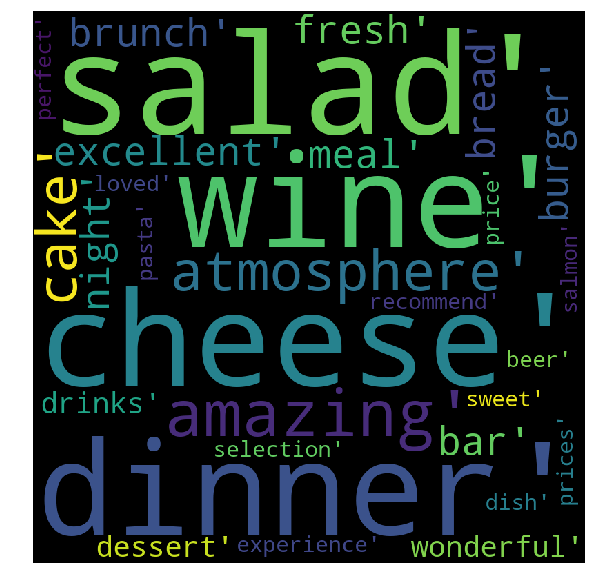

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
%matplotlib inline

cluster1 = ['salad','cheese','dinner','wine','amazing','atmosphere','cake','excellent','night','fresh','brunch',
'meal','bread','bar','burger','wonderful','dessert','drinks','experience','salmon','selection','beer','dish',
'sweet','pasta','loved','prices','perfect','price','recommend']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(str(cluster1))
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


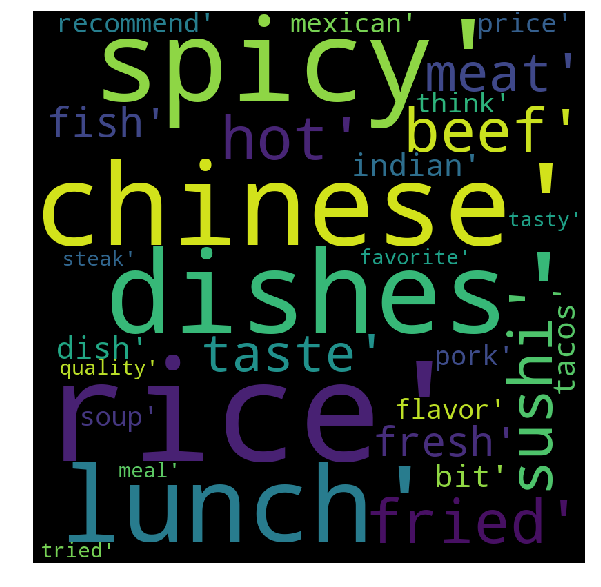

In [4]:
#Cluster2
cluster2 = ['rice','chinese','spicy','dishes','lunch','fried','sushi','hot','beef','meat','taste','fresh',
'fish','indian','dish','bit','tacos','recommend','soup','flavor','price','mexican','pork','think','quality',
'tasty','meal','tried','steak','favorite']
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(str(cluster2))
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

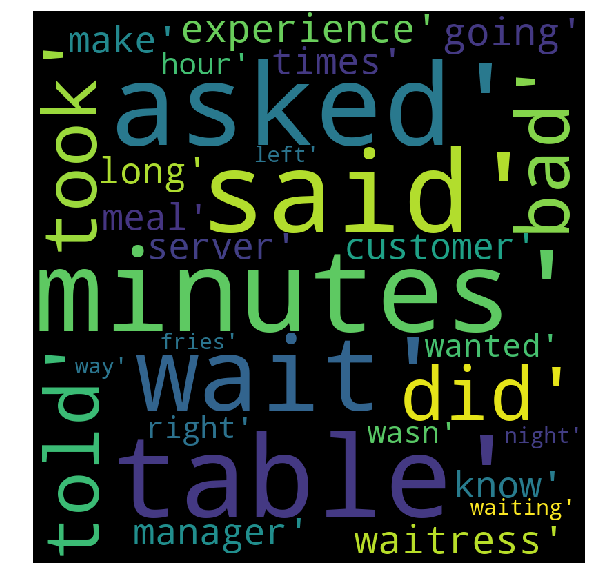

In [5]:
#Cluster-3
cluster3 = ['minutes','table','asked','said','wait','did','took','told','bad','experience','waitress','going',
            'manager','know','make','times','long','customer','server','meal','wanted','right','hour','wasn','waiting',
            'night','left','way','fries']
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(str(cluster3))
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

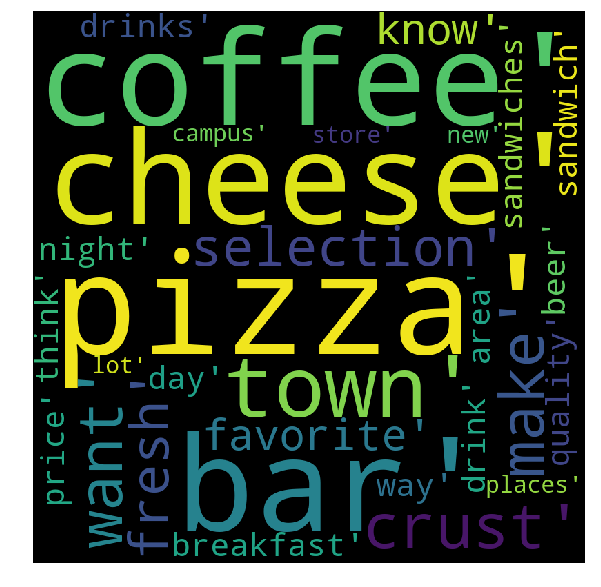

In [6]:
#Cluster-4
cluster4 = ['pizza','coffee','bar','cheese','town','crust','want','make','selection','fresh','favorite',
            'know','breakfast','drinks','quality','area','sandwiches','night','sandwich','way','price',
            'drink','beer','day','think','campus','store','new','places','lot']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(str(cluster4))
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Since the topics identified by LDA are not unique, other models were tried to classify reviews

## 2. Text Classification with Linear SVC

In [5]:
import pandas as pd
import numpy as np
import re

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def LinearSVCModel(text, labels):
    
    mlb = MultiLabelBinarizer()
    X = mlb.fit_transform(labels)

    print("Labels/Classes")
    print(mlb.classes_)

    # check # of samples in each class
    # print(np.sum(X, axis=0))

    # split dataset into train (70%) and test sets (30%)
    X_train, X_test, Y_train, Y_test = train_test_split(text, X, test_size = 0.30, random_state = 0)

    # Multi-label classification - one vs. rest classifier - LinearSVC

    # optimal min_df = 4
    classifier = Pipeline([('tfidf', TfidfVectorizer(min_df = 4, stop_words = "english")),
        ('clf', OneVsRestClassifier(LinearSVC()))])

    classifier.fit(X_train, Y_train)

    predicted = classifier.predict(X_test)
    # pred = mlb.inverse_transform(predicted)
    # print(pred)

    # Accuracy Metrics
    print ("\n")
    print ("LinearSVC")
    print('Accuracy score is {}'.format(accuracy_score(Y_test, predicted)))
    print(classification_report(Y_test, predicted, target_names = mlb.classes_))

if __name__ == "__main__":
    
    demo_df = pd.read_csv("../data/Labeled_IL_Reviews_(413 Samples).csv", header = 0)
    # print(df.head())

    text = demo_df['text'].values
    tags = demo_df['tags'].values

    labels = []
    for x in tags:
        tag = x.split(", ")   # tags are separated by comma and space. Eg, Cleanliness, Food
        labels.append(tag)
    # print (labels)    

    demo_data = list(zip(*(text, labels)))

    text = [x[0] for x in demo_data]
    # print (text)
    # print (data)
    
    LinearSVCModel(text, labels)

Labels/Classes
['Ambience' 'Cleanliness' 'Food' 'None' 'Service']


LinearSVC
Accuracy score is 0.5645161290322581
              precision    recall  f1-score   support

    Ambience       0.78      0.47      0.58        15
 Cleanliness       0.83      0.45      0.59        11
        Food       0.89      0.99      0.94       109
        None       0.00      0.00      0.00         5
     Service       0.83      0.68      0.74        71

   micro avg       0.86      0.80      0.83       211
   macro avg       0.66      0.52      0.57       211
weighted avg       0.83      0.80      0.81       211
 samples avg       0.88      0.82      0.82       211



C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


The optimal parameter for the one vs. rest classifier using LinearSVC that gave best performance is with min_df = 4. The accuracy and performance is observed to be less as the model is not able to capture the context of the reviews well enough to train the data and predict the correct labels for the validation data.

So, we decided to apply another classification model using Convolutional Neural Networks which is described in the next section.

## 3. Text Classification with 1D Convolutional Neural Networks

In [16]:
import json
from sklearn.preprocessing import MultiLabelBinarizer
from numpy.random import shuffle
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, \
Dropout, Activation, Input, Flatten, Concatenate
from keras.models import Model

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

MAX_NB_WORDS = 7500
MAX_DOC_LEN = 100
EMBEDDING_DIM = 100


def find_avg_wordlen(text):
    a = np.asarray(text)
    c = np.array([])
    for i in a:
        b = len(i.split())
        c = np.append(c, b)
    
    print("Average length of sentences is:", np.mean(c))    

def build_tokenizer(text):
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    voc = tokenizer.word_index
    sequences = tokenizer.texts_to_sequences(text)
    # pad all sequences into the same length (the longest)
    padded_sequences = pad_sequences(sequences, \
                                     maxlen=MAX_DOC_LEN, \
                                     padding='post', truncating='post')

    return padded_sequences

def build_model():

    main_input = Input(shape=(MAX_DOC_LEN,), dtype='int32', name='main_input')

    embed_1 = Embedding(input_dim=MAX_NB_WORDS + 1,
                        output_dim=EMBEDDING_DIM,
                        input_length=MAX_DOC_LEN,
                        name='embedding')(main_input)

    conv1d_1 = Conv1D(filters=32, kernel_size=1,
                      name='conv_unigram',
                      activation='relu')(embed_1)

    pool_1 = MaxPooling1D(MAX_DOC_LEN - 1 + 1, \
                          name='pool_unigram')(conv1d_1)

    flat_1 = Flatten(name='flat_unigram')(pool_1)

    conv1d_2 = Conv1D(filters=32, kernel_size=2, \
                      name='conv_bigram', \
                      activation='relu')(embed_1)
    pool_2 = MaxPooling1D(MAX_DOC_LEN - 2 + 1, name='pool_bigram')(conv1d_2)
    flat_2 = Flatten(name='flat_bigram')(pool_2)

    conv1d_3 = Conv1D(filters=32, kernel_size=3, \
                      name='conv_trigram', activation='relu')(embed_1)
    pool_3 = MaxPooling1D(MAX_DOC_LEN - 3 + 1, name='pool_trigram')(conv1d_3)
    flat_3 = Flatten(name='flat_trigram')(pool_3)

    z = Concatenate(name='concate')([flat_1, flat_2, flat_3])

    # Create a dropout layer
    # In each iteration only 50% units are turned on
    drop_1 = Dropout(rate=0.5, name='dropout')(z)

    # Create a dense layer
    dense_1 = Dense(96, activation='relu')(drop_1)
#   
    # Create the output layer
    preds = Dense(5, activation='sigmoid', name='output')(dense_1)

    # create the model with input layer
    # and the output layer
    model = Model(inputs=main_input, outputs=preds)

    return model

if __name__ == "__main__":
    df = pd.read_csv("../labeled_il_reviews.csv", header = 0)
    text = df['text'].values
    tags = df['tags'].values
    labels = []

    for x in tags:
        tag = x.split(", ")   # tags are separated by comma and space. Eg, Cleanliness, Food
        labels.append(tag)

    data = list(zip(*(text, labels)))

    text = [x[0] for x in data]
    find_avg_wordlen(text)
    mlb = MultiLabelBinarizer()
    Y = mlb.fit_transform(labels)
    padded_sequences = build_tokenizer(text)

    # X_train, X_test, y_train, y_test = train_test_split(\
    #                         padded_sequences, Y,\
    #                         test_size=0.3, random_state=1)
    
    X_train = padded_sequences[:380]
    X_val = padded_sequences[380:400]
    X_test = padded_sequences[400:]
    
    y_train = Y[:380]
    y_val = Y[380:400]
    y_test = Y[400:]
    
    cnn_model = build_model()
    print(cnn_model.summary())

    cnn_model.compile(loss="binary_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])
    BATCH_SIZE = 64
    NUM_EPOCHES = 50

#     # fit the model and save fitting history to "training"
    training = cnn_model.fit(X_train, y_train, \
                         batch_size=BATCH_SIZE, \
                         epochs=NUM_EPOCHES, \
                         validation_data=[X_val, y_val])
    
    pred=cnn_model.predict(X_test)
    


Average length of sentences is: 91.57869249394673
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 100)     750100      main_input[0][0]                 
__________________________________________________________________________________________________
conv_unigram (Conv1D)           (None, 100, 32)      3232        embedding[0][0]                  
__________________________________________________________________________________________________
conv_bigram (Conv1D)            (None, 99, 32)       6432        embedding[0][0]                  
___________________________________________________________

In [8]:
import json
from sklearn.preprocessing import MultiLabelBinarizer
from numpy.random import shuffle
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, \
Dropout, Activation, Input, Flatten, Concatenate
from keras.models import Model
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

MAX_NB_WORDS = 7500
MAX_DOC_LEN = 100
EMBEDDING_DIM = 100


def find_avg_wordlen(text):
    a = np.asarray(text)
    c = np.array([])
    for i in a:
        b = len(i.split())
        c = np.append(c, b)
    
    print("Average length of sentences is:", np.mean(c))    

def build_tokenizer(text):
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    voc = tokenizer.word_index
    sequences = tokenizer.texts_to_sequences(text)
    # pad all sequences into the same length (the longest)
    padded_sequences = pad_sequences(sequences, \
                                     maxlen=MAX_DOC_LEN, \
                                     padding='post', truncating='post')

    return padded_sequences

def build_model():

    main_input = Input(shape=(MAX_DOC_LEN,), dtype='int32', name='main_input')

    embed_1 = Embedding(input_dim=MAX_NB_WORDS + 1,
                        output_dim=EMBEDDING_DIM,
                        input_length=MAX_DOC_LEN,
                        name='embedding')(main_input)

    conv1d_1 = Conv1D(filters=32, kernel_size=1,
                      name='conv_unigram',
                      activation='relu')(embed_1)

    pool_1 = MaxPooling1D(MAX_DOC_LEN - 1 + 1, \
                          name='pool_unigram')(conv1d_1)

    flat_1 = Flatten(name='flat_unigram')(pool_1)

    conv1d_2 = Conv1D(filters=32, kernel_size=2, \
                      name='conv_bigram', \
                      activation='relu')(embed_1)
    pool_2 = MaxPooling1D(MAX_DOC_LEN - 2 + 1, name='pool_bigram')(conv1d_2)
    flat_2 = Flatten(name='flat_bigram')(pool_2)

    conv1d_3 = Conv1D(filters=32, kernel_size=3, \
                      name='conv_trigram', activation='relu')(embed_1)
    pool_3 = MaxPooling1D(MAX_DOC_LEN - 3 + 1, name='pool_trigram')(conv1d_3)
    flat_3 = Flatten(name='flat_trigram')(pool_3)

    z = Concatenate(name='concate')([flat_1, flat_2, flat_3])

    # Create a dropout layer
    # In each iteration only 50% units are turned on
    drop_1 = Dropout(rate=0.5, name='dropout')(z)

    # Create a dense layer
    dense_1 = Dense(96, activation='relu')(drop_1)
#   
    # Create the output layer
    preds = Dense(5, activation='sigmoid', name='output')(dense_1)

    # create the model with input layer
    # and the output layer
    model = Model(inputs=main_input, outputs=preds)

    return model

if __name__ == "__main__":
    df = pd.read_csv("/Users/revathyramasundaram/revathy/Stevens/BIA-660-Web-mining/yelp_dataset/topic_modelling/labeled_il_reviews_large.csv", header = 0)
    text = df['text'].values
    tags = df['tags'].values
    labels = []

    for x in tags:
        tag = x.split(", ")   # tags are separated by comma and space. Eg, Cleanliness, Food
        labels.append(tag)

    data = list(zip(*(text, labels)))

    text = [x[0] for x in data]
    find_avg_wordlen(text)
    mlb = MultiLabelBinarizer()
    Y = mlb.fit_transform(labels)
    padded_sequences = build_tokenizer(text)

    # X_train, X_test, y_train, y_test = train_test_split(\
    #                         padded_sequences, Y,\
    #                         test_size=0.3, random_state=1)
    
    X_train = padded_sequences[:380]
    X_val = padded_sequences[380:400]
    X_test = padded_sequences[400:]
    
    y_train = Y[:380]
    y_val = Y[380:400]
    y_test = Y[400:]
    
    cnn_model = build_model()
    print(cnn_model.summary())

    cnn_model.compile(loss="binary_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])
    BATCH_SIZE = 64
    NUM_EPOCHES = 50

#     # fit the model and save fitting history to "training"
    training = cnn_model.fit(X_train, y_train, \
                         batch_size=BATCH_SIZE, \
                         epochs=NUM_EPOCHES, \
                         validation_data=[X_val, y_val])
    
    pred=cnn_model.predict(X_test)


Average length of sentences is: 91.57869249394673
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 100)     750100      main_input[0][0]                 
__________________________________________________________________________________________________
conv_unigram (Conv1D)           (None, 100, 32)      3232        embedding[0][0]                  
__________________________________________________________________________________________________
conv_bigram (Conv1D)            (None, 99, 32)       6432        embedding[0][0]                  
___________________________________________________________

380/380 [==============================] - 0s 717us/step - loss: 0.0884 - acc: 0.9705 - val_loss: 0.2354 - val_acc: 0.9000
Epoch 35/50
380/380 [==============================] - 0s 884us/step - loss: 0.0847 - acc: 0.9737 - val_loss: 0.2384 - val_acc: 0.9000
Epoch 36/50
380/380 [==============================] - 0s 744us/step - loss: 0.0879 - acc: 0.9711 - val_loss: 0.2490 - val_acc: 0.9100
Epoch 37/50
380/380 [==============================] - 0s 707us/step - loss: 0.0718 - acc: 0.9795 - val_loss: 0.2384 - val_acc: 0.9100
Epoch 38/50
380/380 [==============================] - 0s 933us/step - loss: 0.0709 - acc: 0.9795 - val_loss: 0.2310 - val_acc: 0.8900
Epoch 39/50
380/380 [==============================] - 0s 785us/step - loss: 0.0647 - acc: 0.9800 - val_loss: 0.2333 - val_acc: 0.9000
Epoch 40/50
380/380 [==============================] - 0s 920us/step - loss: 0.0558 - acc: 0.9863 - val_loss: 0.2449 - val_acc: 0.9100
Epoch 41/50
380/380 [==============================] - 0s 937us/ste

In [24]:
import json
from sklearn.preprocessing import MultiLabelBinarizer
from numpy.random import shuffle
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, \
Dropout, Activation, Input, Flatten, Concatenate
from keras.models import Model
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

MAX_NB_WORDS = 7500
MAX_DOC_LEN = 100
EMBEDDING_DIM = 100


def find_avg_wordlen(text):
    a = np.asarray(text)
    c = np.array([])
    for i in a:
        b = len(i.split())
        c = np.append(c, b)
    
    print("Average length of sentences is:", np.mean(c))    

def build_tokenizer(text):
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    voc = tokenizer.word_index
    sequences = tokenizer.texts_to_sequences(text)
    # pad all sequences into the same length (the longest)
    padded_sequences = pad_sequences(sequences, \
                                     maxlen=MAX_DOC_LEN, \
                                     padding='post', truncating='post')

    return padded_sequences

def build_model():

    main_input = Input(shape=(MAX_DOC_LEN,), dtype='int32', name='main_input')

    embed_1 = Embedding(input_dim=MAX_NB_WORDS + 1,
                        output_dim=EMBEDDING_DIM,
                        input_length=MAX_DOC_LEN,
                        name='embedding')(main_input)

    conv1d_1 = Conv1D(filters=32, kernel_size=1,
                      name='conv_unigram',
                      activation='relu')(embed_1)

    pool_1 = MaxPooling1D(MAX_DOC_LEN - 1 + 1, \
                          name='pool_unigram')(conv1d_1)

    flat_1 = Flatten(name='flat_unigram')(pool_1)

    conv1d_2 = Conv1D(filters=32, kernel_size=2, \
                      name='conv_bigram', \
                      activation='relu')(embed_1)
    pool_2 = MaxPooling1D(MAX_DOC_LEN - 2 + 1, name='pool_bigram')(conv1d_2)
    flat_2 = Flatten(name='flat_bigram')(pool_2)

    conv1d_3 = Conv1D(filters=32, kernel_size=3, \
                      name='conv_trigram', activation='relu')(embed_1)
    pool_3 = MaxPooling1D(MAX_DOC_LEN - 3 + 1, name='pool_trigram')(conv1d_3)
    flat_3 = Flatten(name='flat_trigram')(pool_3)

    z = Concatenate(name='concate')([flat_1, flat_2, flat_3])

    # Create a dropout layer
    # In each iteration only 50% units are turned on
    drop_1 = Dropout(rate=0.5, name='dropout')(z)

    # Create a dense layer
    dense_1 = Dense(96, activation='relu')(drop_1)
#   
    # Create the output layer
    preds = Dense(5, activation='sigmoid', name='output')(dense_1)

    # create the model with input layer
    # and the output layer
    model = Model(inputs=main_input, outputs=preds)

    return model

if __name__ == "__main__":
    df = pd.read_csv("../labeled_il_reviews.csv", header = 0)
    text = df['text'].values
    tags = df['tags'].values
    labels = []

    for x in tags:
        tag = x.split(", ")   # tags are separated by comma and space. Eg, Cleanliness, Food
        labels.append(tag)

    data = list(zip(*(text, labels)))

    text = [x[0] for x in data]
    find_avg_wordlen(text)
    mlb = MultiLabelBinarizer()
    Y = mlb.fit_transform(labels)
    padded_sequences = build_tokenizer(text)

   
    X_train = padded_sequences[:310]
    X_val = padded_sequences[310:330]
    X_test = padded_sequences[330:]
    
    y_train = Y[:310]
    y_val = Y[310:330]
    y_test = Y[330:]
    
    cnn_model = build_model()
    print(cnn_model.summary())

    cnn_model.compile(loss="binary_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])
    BATCH_SIZE = 64
    NUM_EPOCHES = 50

#     # fit the model and save fitting history to "training"
    training = cnn_model.fit(X_train, y_train, \
                         batch_size=BATCH_SIZE, \
                         epochs=NUM_EPOCHES, \
                         validation_data=[X_val, y_val])
    
    pred=cnn_model.predict(X_test)

Average length of sentences is: 91.57869249394673
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 100)     750100      main_input[0][0]                 
__________________________________________________________________________________________________
conv_unigram (Conv1D)           (None, 100, 32)      3232        embedding[0][0]                  
__________________________________________________________________________________________________
conv_bigram (Conv1D)            (None, 99, 32)       6432        embedding[0][0]                  
___________________________________________________________

310/310 [==============================] - 0s 1ms/step - loss: 0.1046 - acc: 0.9671 - val_loss: 0.2433 - val_acc: 0.9300
Epoch 35/50
310/310 [==============================] - 0s 1ms/step - loss: 0.1046 - acc: 0.9645 - val_loss: 0.2420 - val_acc: 0.9300
Epoch 36/50
310/310 [==============================] - 0s 1ms/step - loss: 0.1115 - acc: 0.9626 - val_loss: 0.2409 - val_acc: 0.9300
Epoch 37/50
310/310 [==============================] - 0s 1ms/step - loss: 0.0959 - acc: 0.9690 - val_loss: 0.2463 - val_acc: 0.9000
Epoch 38/50
310/310 [==============================] - 0s 1ms/step - loss: 0.0873 - acc: 0.9710 - val_loss: 0.2505 - val_acc: 0.9000
Epoch 39/50
310/310 [==============================] - 0s 1ms/step - loss: 0.0803 - acc: 0.9768 - val_loss: 0.2458 - val_acc: 0.9200
Epoch 40/50
310/310 [==============================] - 0s 894us/step - loss: 0.0685 - acc: 0.9839 - val_loss: 0.2503 - val_acc: 0.9100
Epoch 41/50
310/310 [==============================] - 0s 2ms/step - loss: 0.07

In [20]:
pred = np.where(pred > 0.5, 1, 0)
print(classification_report(y_test, pred, target_names = ['ambience', 'cleanliness', 'food', 'none', 'service']))

              precision    recall  f1-score   support

    ambience       0.60      0.30      0.40        20
 cleanliness       0.71      0.56      0.63         9
        food       0.99      0.99      0.99        82
        none       0.00      0.00      0.00         1
     service       0.57      0.79      0.67        39

   micro avg       0.80      0.81      0.81       151
   macro avg       0.58      0.53      0.54       151
weighted avg       0.81      0.81      0.80       151
 samples avg       0.83      0.85      0.80       151



### 3.1 Calculate test accuracy

In [25]:
scores = cnn_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

acc: 89.64%


In [26]:
df = pd.DataFrame.from_dict(training.history)
df.columns = ["train_loss", "train_acc", \
              "val_loss", "val_acc"]
df.index.name = 'epoch'
print(df)

       train_loss  train_acc  val_loss   val_acc
epoch                                           
0        0.638564       0.89  0.683092  0.598065
1        0.574909       0.89  0.627615  0.801290
2        0.495719       0.89  0.572383  0.809677
3        0.407928       0.86  0.513918  0.806452
4        0.326236       0.89  0.457569  0.812903
5        0.270866       0.89  0.433802  0.814194
6        0.247122       0.89  0.420334  0.823871
7        0.245365       0.89  0.419184  0.827742
8        0.253214       0.89  0.415563  0.836129
9        0.265703       0.88  0.399666  0.850968
10       0.275362       0.89  0.397984  0.851613
11       0.277386       0.89  0.383764  0.851613
12       0.275311       0.89  0.372639  0.863871
13       0.270572       0.88  0.363286  0.865161
14       0.266883       0.89  0.355336  0.868387
15       0.263360       0.88  0.341924  0.872903
16       0.262075       0.88  0.325356  0.872258
17       0.266176       0.89  0.315148  0.879355
18       0.270295   

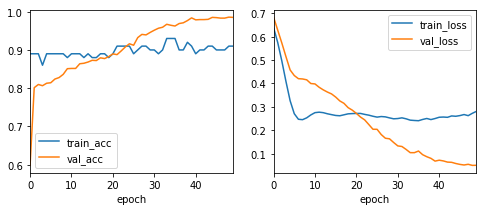

In [27]:
# plot training history
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3));

df[["train_acc", "val_acc"]].plot(ax=axes[0]);
df[["train_loss", "val_loss"]].plot(ax=axes[1]);
plt.show();

## 3.2 Analysis of CNN model for our dataset

1. The reviews(text) were first converted to word vectors of fixed length dimension before feeding into the CNN model
2. Hyperparameters: <br>
    (i) MAX_NB_WORDS = 7500 (Number of unique words in the dataset ~7500) <br>
    (ii)MAX_DOC_LEN = 100 (Average length of sentences is 95) <br>
    (iii)EMBEDDING_DIM = 100 (Each word is represented as a 100 dimensional vector) <br>
    (iv) Epochs - 50 <br>
3. Building the CNN model: <br>
    (i)  A filter with 1 * 1 kernel to study the relationship between unigrams <br>
    (ii) Another filter with 2 * 2 kernel to study the bigrams <br>
    (ii) Another filter with 3 * 3 kernel to study the trigrams <br>
4. The test accuracy achieved is ~83% <br>
5. The precision for each label is above ~70% <br>

With Linear SVC, the maximum accuracy achieved was ~56%.

## 3.3 Convert remaining samples to padded sequences

For the model to predict labels for the remaining samples, the remaining samples have to be converted to word vectors(padded sequences). The code below takes every review text and converts it to the same fixed length dimensions that the model was trained before

In [ ]:
il_text = il_df['text'].values[:1000]
il_padded_sequences = build_tokenizer(il_text)
X_new = il_padded_sequences[413:]

## 3.4 Predicting labels for remaining samples

Now that we have created padded sequences for rest of the reviews, the trained CNN model can be used to predict their labels. 
(Since we are asked to submit a total of 1000 samples, the code below predicts for the remaining 587 unlabelled samples.)

In [8]:
print(len(X_new))
il_pred = cnn_model.predict(X_new)
il_pred = np.where(il_pred > 0.5, 1, 0)
print(il_pred[:10])

587
[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 1]
 [0 0 1 0 1]
 [0 0 1 0 1]
 [0 0 1 0 1]
 [0 0 1 0 1]
 [0 0 1 0 1]
 [0 0 1 0 1]
 [0 0 1 0 0]]


The labels are onehot encoded. The following code converts them to their corresponding labels. The obtained labels are then used to tag each review. These reviews can be found in the file - 'reviews_with_predicted_labels.csv'

In [9]:
l = ['Ambience' 'Cleanliness' 'Food' 'None' 'Service']
amb_pred = il_pred[:, 0]
amb_pred = np.where(amb_pred == 1, 'ambience', '')
amb_pred = [[i] for i in amb_pred]

f_pred = il_pred[:, 2]
f_pred = np.where(f_pred == 1, 'food', '')
f_pred = [[i] for i in f_pred]

c_pred = il_pred[:, 1]
c_pred = np.where(c_pred == 1, 'cleanliness', '')
c_pred = [[i] for i in c_pred]

s_pred = il_pred[:, 4]
s_pred = np.where(s_pred == 1, 'service', '')
s_pred = [[i] for i in s_pred]

labels = list(zip(f_pred, c_pred, amb_pred, s_pred))
print(labels[:5])
with open('/Users/revathyramasundaram/revathy/Stevens/BIA-660-Web-mining/yelp_dataset/topic_modelling/final_il_reviews_labels.txt', 'w') as infile:
    for line in labels:
        infile.write("{}\n".format(line))
print("done")    

[(['food'], [''], [''], ['']), (['food'], [''], [''], ['']), (['food'], [''], [''], ['service']), (['food'], [''], [''], ['service']), (['food'], [''], [''], ['service'])]
done


## 3.5 Check a few predicted samples

In [11]:
import pandas as pd
pred_df = pd.read_csv("../reviews_with_predicted_labels.csv", header = 0)
pred_labels = pred_df['predicted_labels']
reviews = pred_df['text']

print("Review: \n", reviews[5])
print("\n Predicted Label: \n", pred_labels[5])

print("\n Review: \n", reviews[7])
print("\n Predicted Label: \n", pred_labels[7])

print("\n Review: \n", reviews[8])
print("\n Predicted Label: \n", pred_labels[8])

print("\n Review: \n", reviews[9])
print("\n Predicted Label: \n", pred_labels[9])

Review: 
 I ate here once and once was enough. It's an insult to even call this place a deli. I didn't even see typical "deli" food on the menu! My soup was bland and very overpriced. The only good thing I can say was that the guy working there was friendly.

 Predicted Label: 
 food, service

 Review: 
 This place gets 3.5 stars from me.
 So I went to McAlister's Deli pretty excited because the word deli was involved... well... I would hardly call it a deli. Deli's are so much more than just a place that has sandwiches!
 I ended up ordering the baked potato with veggie chili and some pepperjack cheese with jalapenos on top. It must have been two baked potatoes opened up because this thing took up the whole to go box that it was in. I must say, it was pretty good... nothing I couldn't make at home but hey.. we all get lazy sometimes.
 At first I was thinking...wow... that's a lot for a baked potato... but this thing was so huge that it was totally worth it. I would suggest this place..

### 3.5.1 Learnings from building a CNN

- Prediction for the last review is <B>food</B>. But the review also talks about <B>service</B>. The prediction is not perfect for all the samples, especially for the lengthier reviews. 
- This is one of the disadvantages of using CNN. A 1d convnet can only process fixed dimension word vectors. But customer reviews vary in length; some are as short as 10 words, some are as large as 900 words. So, cutting off the reviews at 100 words(average review length) is not the best approach. 
- To learn from all the words in a review we have to take advantage of other deep learning approaches such as Recurrent Neural Networks, or Long Short Term Memory models.


## 4. Extracting aspect terms using word-2-vector

In order to perform aspect based sentiment analysis, finding a list of words that belong to a particular aspect is very important. For example, <br>

Review 1: <br>
    "The food was really good" <br>

Review 2: <br>
    "The soup was very bland, i did not like it" <br>

Review 3: <br>
    "This place has the best burgers" <br>

The above reviews talk about 'food' aspect of the restaurant. through text classification we know that this review talks about food. However, food is not always directly referred to as only 'food'. It is referred to as *'soup'*, and *'burgers'* in the 2nd and 3rd reviews respectively. How to come up with a list of words that talk about 'food' aspect? Similarly, how do we determine the list of words that refer to 'ambience', 'cleanliness', or 'service'?  

We used word-2-vector embeddings to find out the terms similar to the aspect terms. This was created from all the reviews in the dataset. <br>
Hyper parameters tuned: <br>
1. min_count = 5
2. size = 200
3. window = 5

In [30]:
import pandas as pd
import nltk,string
from gensim.models import word2vec
import logging
import pandas as pd
from nltk.corpus import stopwords
from keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

# Load data
data=pd.read_csv('../il_reviews.csv', header=0)


stop_words = list(stopwords.words('english'))

sentences=[ [token.strip(string.punctuation).strip() \
             for token in nltk.word_tokenize(doc.lower()) \
                 if token not in stop_words and token not in string.punctuation and \
                 len(token.strip(string.punctuation).strip())>=2]\
             for doc in data["text"]]

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)
size = 200
wv_model = word2vec.Word2Vec(sentences, \
            min_count=5, size=200, iter=10,\
            window=5, workers=4 )

2019-05-10 12:36:15,937 : INFO : collecting all words and their counts
2019-05-10 12:36:15,941 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-10 12:36:16,110 : INFO : PROGRESS: at sentence #10000, processed 528482 words, keeping 23601 word types
2019-05-10 12:36:16,121 : INFO : collected 24608 word types from a corpus of 572509 raw words and 10848 sentences
2019-05-10 12:36:16,122 : INFO : Loading a fresh vocabulary
2019-05-10 12:36:16,168 : INFO : effective_min_count=5 retains 7066 unique words (28% of original 24608, drops 17542)
2019-05-10 12:36:16,169 : INFO : effective_min_count=5 leaves 545388 word corpus (95% of original 572509, drops 27121)
2019-05-10 12:36:16,213 : INFO : deleting the raw counts dictionary of 24608 items
2019-05-10 12:36:16,214 : INFO : sample=0.001 downsamples 44 most-common words
2019-05-10 12:36:16,215 : INFO : downsampling leaves estimated 503659 word corpus (92.3% of prior 545388)
2019-05-10 12:36:16,260 : INFO : estima

### 4.1 Aspect terms for food

2019-05-10 12:54:53,042 : INFO : precomputing L2-norms of word weight vectors


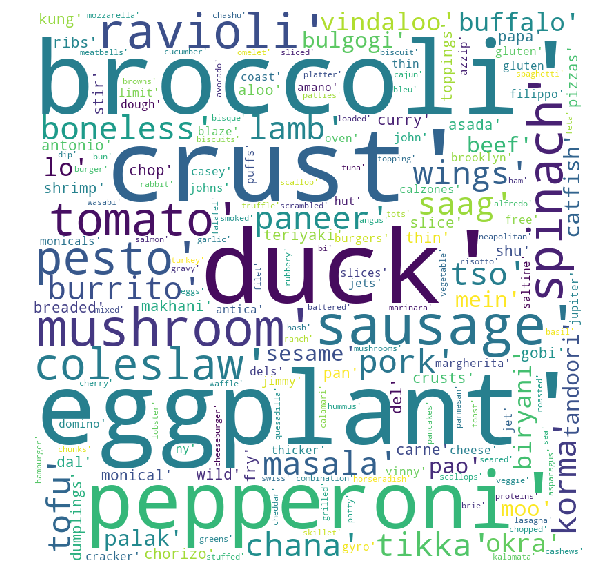

In [31]:
#Wordcloud for food
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

chicken = wv_model.wv.most_similar('chicken', topn=50)
food_aspect_terms = [f[0] for f in chicken]
pizza = wv_model.wv.most_similar('pizza', topn=50)
food_aspect_terms.extend([f[0] for f in pizza])
pasta = wv_model.wv.most_similar('pasta', topn=50)
food_aspect_terms.extend([f[0] for f in pasta])
t = wv_model.wv.most_similar('food', topn=50)
food_aspect_terms.extend([f[0] for f in t])



wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(food_aspect_terms))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### 4.2 Aspect terms for cleanliness

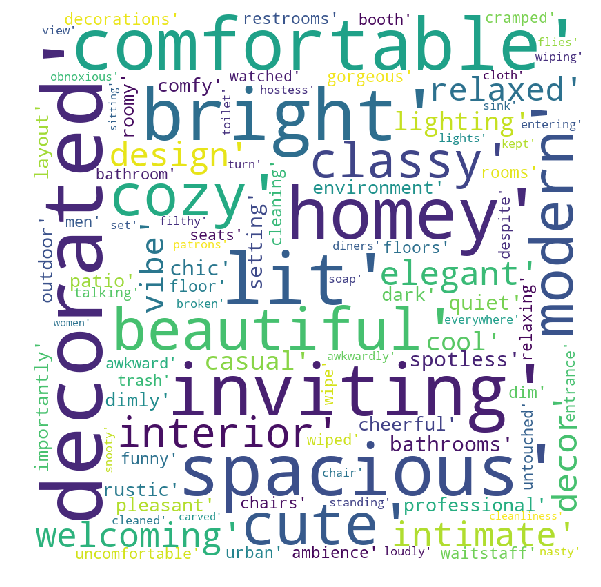

In [32]:
#WordCloud for cleanliness aspect term
cleanliness_aspect_terms = wv_model.wv.most_similar('clean', topn=50)
cleanliness_aspect_terms.extend(wv_model.wv.most_similar('dirty', topn=50))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(cleanliness_aspect_terms))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### 4.3 Aspect terms for service

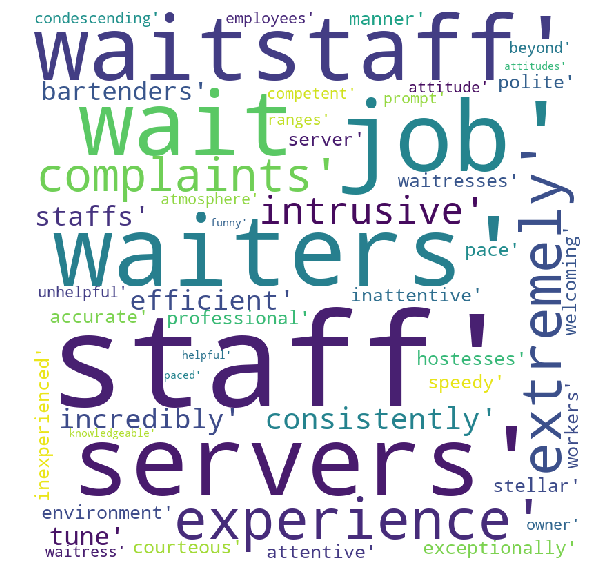

In [33]:
#Wordcloud for 'service' aspect
service_aspect_terms = wv_model.wv.most_similar('service', topn=50)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(service_aspect_terms))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### 4.4 Aspect terms for ambience

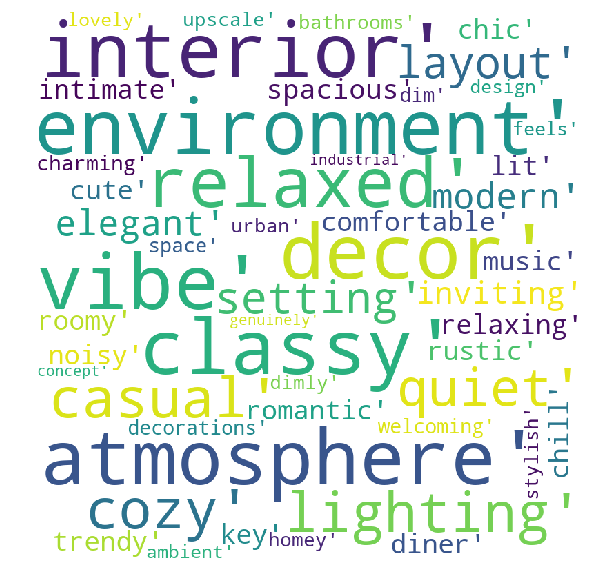

In [34]:
#WordCloud for ambience aspect term
ambience_aspect_terms = wv_model.wv.most_similar('ambience', topn=50)
# cleanliness_aspect_terms.extend(wv_model.wv.most_similar('dirty', topn=50))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(ambience_aspect_terms))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## 5. Aspect Based Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import corenlp
import nltk
from textblob import TextBlob
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import string

<B>The 'Labeled_IL_Reviews.csv' has 1000 samples that are labeled with the aspect terms</B>

In [2]:
df_Labeled = pd.read_csv("./Labeled_IL_Reviews.csv")

In [3]:
df_Labeled.head(3)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tags
0,mofOjB6flg-eAWOFbOkHfQ,0,12-02-2017 20:22,0,8MTptiOpUeuPUFZgtfk9Vw,1,I would have given this restaurant zero stars ...,1,9-vNlkNQL7OJQZ7-U965Ww,"Cleanliness, Food"
1,mofOjB6flg-eAWOFbOkHfQ,0,12/16/2017 4:31,0,ofpfzn8LV4nJ2pE6IlTVdg,1,So...no. Just...no. Before I picked up a plate...,1,#NAME?,"Cleanliness, Food, Service"
2,mofOjB6flg-eAWOFbOkHfQ,0,07-03-2016 20:57,1,O3yApCw95tbA0kodflQrpA,5,The best food I want to the a lot of the buffe...,0,ShcyA_bTtqudK4eaSbtLGA,"Food, Service"


<B>columns like cool, date and funny are not useful for are analysis so we just drop it</B>

In [4]:
df_Labeled = df_Labeled.drop(["cool","date","funny"],axis = 1)

In [5]:
df_Labeled.head(3)

,business_id,review_id,stars,text,useful,user_id,tags
0,mofOjB6flg-eAWOFbOkHfQ,8MTptiOpUeuPUFZgtfk9Vw,1,I would have given this restaurant zero stars ...,1,9-vNlkNQL7OJQZ7-U965Ww,"Cleanliness, Food"
1,mofOjB6flg-eAWOFbOkHfQ,ofpfzn8LV4nJ2pE6IlTVdg,1,So...no. Just...no. Before I picked up a plate...,1,#NAME?,"Cleanliness, Food, Service"
2,mofOjB6flg-eAWOFbOkHfQ,O3yApCw95tbA0kodflQrpA,5,The best food I want to the a lot of the buffe...,0,ShcyA_bTtqudK4eaSbtLGA,"Food, Service"


In [6]:
df_inList = df_Labeled.values.tolist()

<B>A sample of the data is shown below</B>

In [7]:
df_inList[0]

['mofOjB6flg-eAWOFbOkHfQ',
 '8MTptiOpUeuPUFZgtfk9Vw',
 1,
 'I would have given this restaurant zero stars if the app allowed it. This is a disgusting restaurant. You can find roaches lurching around the food. The clean dishes next to buffet items are mostly dirty. Just look at the bottom of the plate. This restaurant should really be inspected by authorities.',
 1,
 '9-vNlkNQL7OJQZ7-U965Ww',
 'Cleanliness, Food']

In [8]:
food_aspects = []
ambience_aspects = []
cleanliness_aspects = []
service_aspects = []

<B>5.1 The file Aspect.csv has all the aspect terms that we got from word2vec </B>

In [9]:
df_Aspect = pd.read_csv("Aspect.csv")

In [10]:
service_aspects_word = df_Aspect.Service.to_list()
food_aspects_word = df_Aspect.Food.to_list()
cleanliness_aspects_word = df_Aspect.Cleanliness.to_list()
ambience_aspects_word = df_Aspect.Ambience.to_list()

<B> 5.2 The method 'addItProperly' adds the review to the given label for example if the parameter label is 'food' then it adds the parameter 'review' to 'food' list

In [11]:
def addItProperly(label,review):
    label = label.lower().strip()
    if label == "food":
        food_aspects.append(review)
        pass
    elif label == "ambience":
        ambience_aspects.append(review)
        pass
    elif label == "cleanliness":
        cleanliness_aspects.append(review)
        pass
    elif label == "service":
        service_aspects.append(review)
        pass

<B>5.3 The method 'getLabel' gives the aspect of the input paramter by checking it with Aspect.csv</B>

In [13]:
def getLabel(text):
    temp = nltk.pos_tag(nltk.word_tokenize(text))
    nounList = [val for val in temp if "NN" in val[1]]
    category = ""
    for val in nounList:
        if val[0] in food_aspects_word:
            category = "food"
        elif val[0] in service_aspects_word:
            category = "service"
        elif val[0] in cleanliness_aspects_word:
            category = "cleanliness"
        elif val[0] in ambience_aspects_word:
            category = "ambience"
            pass
    else:
        return category
    return "wrong"

In [14]:
def check_if_present(done,word,s):
    for val in done:
        if val[0] == word:
            return True
    return False

The method 'aspect_based_sentimental_analysis' gives the sentiment analysis for the input parameters it first performs sentence tokenization then It first checks how many aspects does the review belongs to if it has only one aspect then we get the polarity for that review directly. If it has multiple aspect then it first checks the noun term and the adjective and it's dependent adjective and gives it to TextBlob library which gives the polarity for each review.

In [15]:
def aspect_based_sentimental_analysis(df_inList):
    for index, val in enumerate(df_inList):
        Label_Count = len([temp.strip() for temp in val[6].split(",")]) # val[6] is the label count
        if Label_Count == 1:
            sentence_Tokenized = sent_tokenize(val[3])
            one_review_sentiment = []
            for sent_val in sentence_Tokenized:
                s = TextBlob(sent_val).sentiment.polarity
                if s!=0:
                    one_review_sentiment.append(s)
                pass
            if len(one_review_sentiment) !=0 :
                df_inList[index].append(sum(one_review_sentiment)/len(one_review_sentiment))
                pass
            else:
                df_inList[index].append(0)
            pass
            addItProperly([temp.strip() for temp in val[6].split(",")][0],df_inList[index])
        else:
            sentence_Tokenized = sent_tokenize(val[3]) # val[3] gives the text of the data
            for sent_val in sentence_Tokenized:
                done = []
                with corenlp.CoreNLPClient(timeout=30000,annotators="openie".split()) as client:
                    ann = client.annotate(sent_val)
                te = ann.sentence[0]
                for check in te.enhancedDependencies.edge:
                    if "amod" in check.dep or "nsubj" in check.dep:
                        v1 = te.token[check.target - 1].pos
                        v2 = te.token[check.source - 1].pos
                        if ("NN" in v1 and "JJ" in v2) or ("JJ" in v1 and "NN" in v2):
                            print("NN and JJ")
                            se = te.token[check.target - 1].word + " " + te.token[check.source - 1].word
                            s = TextBlob(sent_val).sentiment.polarity
                            print(f"sentence is {sent_val} and polarity is {s}")
                            if (s!= 0) and (not check_if_present(done,v1,s)) and (not check_if_present(done,v2,s)):
                                reviewLabel = getLabel(sent_val)
                                copy = val[:]
                                copy[3] = sent_val
                                copy[6] = reviewLabel
                                copy.append(s)
                                done.append([v1,s])
                                done.append([v2,s])
                                addItProperly(reviewLabel,copy)
                        pass
                    elif check.dep == "asdf":
                        pass
                    pass
                pass
            pass
        pass
    return df_inList

<B>5.4 The results of first five reviews. </B>

In [16]:
temp_df = aspect_based_sentimental_analysis(df_inList[:5])

NN and JJ
sentence is This is a disgusting restaurant. and polarity is -1.0
NN and JJ
sentence is The clean dishes next to buffet items are mostly dirty. and polarity is -0.07777777777777777
NN and JJ
sentence is I alerted a waitress, who acted as if it was nothing new, and she removed the tongs the roach was crawling on. and polarity is 0.13636363636363635
NN and JJ
sentence is The best food I want to the a lot of the buffet restaurant this is the best place to eat and Great service and polarity is 0.9333333333333332
NN and JJ
sentence is Aside from that the bathroom condition was dirty everywhere. and polarity is -0.6
NN and JJ
sentence is The floor was sticky in the main part of the restaurant and especially around where I sat. and polarity is 0.08333333333333333
NN and JJ
sentence is Even the area where the staff hung out, where the drinks were dispensed, was very dirty. and polarity is -0.78
NN and JJ
sentence is The only worthwhile feature is that the food is plentiful. and polar

<B>5.5 food_aspects has all the reviews that belonged to food aspect</B>

In [17]:
food_aspects

[['mofOjB6flg-eAWOFbOkHfQ',
  '8MTptiOpUeuPUFZgtfk9Vw',
  1,
  'This is a disgusting restaurant.',
  1,
  '9-vNlkNQL7OJQZ7-U965Ww',
  'food',
  -1.0],
 ['mofOjB6flg-eAWOFbOkHfQ',
  'fFTVZE7EENdl66SX9cgc0A',
  1,
  'The floor was sticky in the main part of the restaurant and especially around where I sat.',
  0,
  'oxcEFkXu_icNyp59Lb8GMQ',
  'food',
  0.08333333333333333],
 ['mofOjB6flg-eAWOFbOkHfQ',
  'pDlIw6DLLjZ5G1vJnMzr9A',
  5,
  'I was visiting the Champaign area with my family who just recently moved there.  And they suggested that I try this buffet.  When I got there was amazed how good their food is.  It is far better than my regular buffet in Lansing.  If I ever return back to Champaign I will be going back, even though it is a little pricy.',
  0,
  'szNYE9rpw4Dv-J0LFs5R7g',
  'Food',
  0.2791666666666666]]

<B>5.6 cleanliness_aspects has all the reviews that belonged to cleanliness aspect</B>

In [19]:
cleanliness_aspects

[['mofOjB6flg-eAWOFbOkHfQ',
  '8MTptiOpUeuPUFZgtfk9Vw',
  1,
  'The clean dishes next to buffet items are mostly dirty.',
  1,
  '9-vNlkNQL7OJQZ7-U965Ww',
  'cleanliness',
  -0.07777777777777777],
 ['mofOjB6flg-eAWOFbOkHfQ',
  'ofpfzn8LV4nJ2pE6IlTVdg',
  1,
  'I alerted a waitress, who acted as if it was nothing new, and she removed the tongs the roach was crawling on.',
  1,
  '#NAME?',
  'cleanliness',
  0.13636363636363635],
 ['mofOjB6flg-eAWOFbOkHfQ',
  'fFTVZE7EENdl66SX9cgc0A',
  1,
  'Aside from that the bathroom condition was dirty everywhere.',
  0,
  'oxcEFkXu_icNyp59Lb8GMQ',
  'cleanliness',
  -0.6],
 ['mofOjB6flg-eAWOFbOkHfQ',
  'fFTVZE7EENdl66SX9cgc0A',
  1,
  'I like to eat someplace clean with better food.',
  0,
  'oxcEFkXu_icNyp59Lb8GMQ',
  'cleanliness',
  0.43333333333333335]]

<B>5.7 service_aspects has all the reviews that belonged to service aspect</B>

In [20]:
service_aspects

[['mofOjB6flg-eAWOFbOkHfQ',
  'O3yApCw95tbA0kodflQrpA',
  5,
  'The best food I want to the a lot of the buffet restaurant this is the best place to eat and Great service',
  0,
  'ShcyA_bTtqudK4eaSbtLGA',
  'service',
  0.9333333333333332],
 ['mofOjB6flg-eAWOFbOkHfQ',
  'fFTVZE7EENdl66SX9cgc0A',
  1,
  'Even the area where the staff hung out, where the drinks were dispensed, was very dirty.',
  0,
  'oxcEFkXu_icNyp59Lb8GMQ',
  'service',
  -0.78]]

<B>5.8 get_rating method converts the sentiment to rating </B>

To get rating from polarity we use the following technique:- <br>
- First we check if the rating is positive then we multiple it by 5. 
- If the rating is less than 0 then we give it one star.

In [25]:
def get_rating(df_list):
    for val in df_list:
#         val[7] is the polarity 
        if val[7] < 0:
            val[7] = 1
        else:
            val[7] = 5 * val[7]
    return df_list

In [26]:
pd.DataFrame(get_rating(food_aspects)).to_csv("./result/food_reviews.csv")

In [27]:
pd.DataFrame(get_rating(service_aspects)).to_csv("./result/service_reviews.csv")

In [28]:
pd.DataFrame(get_rating(cleanliness_aspects)).to_csv("./result/cleanliness_reviews.csv")

In [29]:
pd.DataFrame(get_rating(ambience_aspects)).to_csv("./result/ambience_reviews.csv")

# 6. Conclusion

To verify the efficiency of our method, we considered the restaurant that has business_id as '5-Z7VmiTqD4ycnrxfBJGmQ'.

It has 3 reviews and the rating for them are as follows

<B>1. Decent pizza if you like thin crust. Sometimes great sometimes iffy customer service.</B>
- Here the Food aspect is 0.166.
- The service aspect is 0.8

<B>2. Slow service, they burn the pizza and it is always a complete zoo.  Skip this one and drive to Champaign.</B><br>
This review tells only about the service aspect 
- Service aspect is -0.33

<B>3. This is the pizza place in town that we order from the most.  We are partial to their crispy thin crust pizza.  The food always tastes great just as we expect.  Frequently (at least 50% of the time) they get our order wrong.</B>
- Here the food aspect is 0.8
- The service aspect is -0.4

###### When we calculate the average rating for that restaurant for all the aspects then it comes out to be
- Food - 2.4
- Service - 1.79

### Inference
- The average rating (given by customers) for this restaurant is <B>2.3</B>. A rating of 2.3 is a low rating for a restaurant. But this does not explain which aspect of the restaurant is poor. From our <B>Aspect Based Sentiment Analysis</B> and rating, it is clear that the <B>'service'</B> aspect is very poor, and the restaurant has to definitely improve their services to attract more customers.

- This kind of analysis may help a business to understand why their customers like/dislike them;  to improve the features that they lack.

- For restaurants with similar ratings, this kind of analysis may help a business to out-perform their competitors.


# 7. Future work

#### Experiment with other deep learning models
- In the current approach, only the first 100 words of reviews are studied by the Deep Learning model. Other models like RNN or LSTM can deal with sentences of different lengths. These models could be used to study reviews in more detail <br>

#### Expand the scope of our application
- As of now, our application tells the rating about the aspects. We aim to make this project to be used in real life for that we require many other features so we plane to include the following features.
- Search options based on cuisine, music, location, etc.
- Select a restaurant based on the signature dish, waiting time, food items.

A user could get answers for the following type of questions like
- Best Chinese restaurant near me
- Which restaurant has the best pizza
- When is the waiting time higher?